In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import os 

# Functions 

In [17]:
def makeCorrPlot(data, file_name, annot = False):
    fig, ax = plt.subplots(figsize=(15,15))

    # Compute the correlation matrix
    corrMask = data.corr()

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Generate a mask for the upper triangle
    maskTriangle = np.zeros_like(corrMask, dtype=np.bool)
    maskTriangle[np.triu_indices_from(maskTriangle)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corrMask, mask=maskTriangle, cmap=cmap, ax=ax, center=0,
                square=True, linewidths=1, cbar_kws={"shrink": .5}, vmin=-1, vmax=1,annot = annot)

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.tight_layout()
    plt.ticklabel_format()
    plt.savefig(os.path.join('figures', 'correlation', f'{file_name}.png'), format = 'png')
    plt.show()
    return corrMask

# Loading Data 

In [3]:
os.chdir('..')

In [4]:
data = pd.read_parquet(os.path.join(os.getcwd(), 'data','modelData', 'modelData.parquet'))

# Processing 

## Selecting 

In [5]:
cond1 = (data['BIN'] == 32)
cond2 = (data['MASK'] == 1)

data = data[cond1&cond2]
data.reset_index(drop = True, inplace = True)
data.drop(columns = ['MASK','BIN','ID'],inplace = True)

## Standardizing 

In [6]:
y = data['SEVERE']
X = data.drop(columns='SEVERE')

In [7]:
X_standard = StandardScaler().fit_transform(X)
X_standard=pd.DataFrame(X_standard, columns=data.columns[1:])

In [8]:
data = pd.concat([y,X_standard], axis = 1)

# Checking Feature Correlation

## Correlation all to all

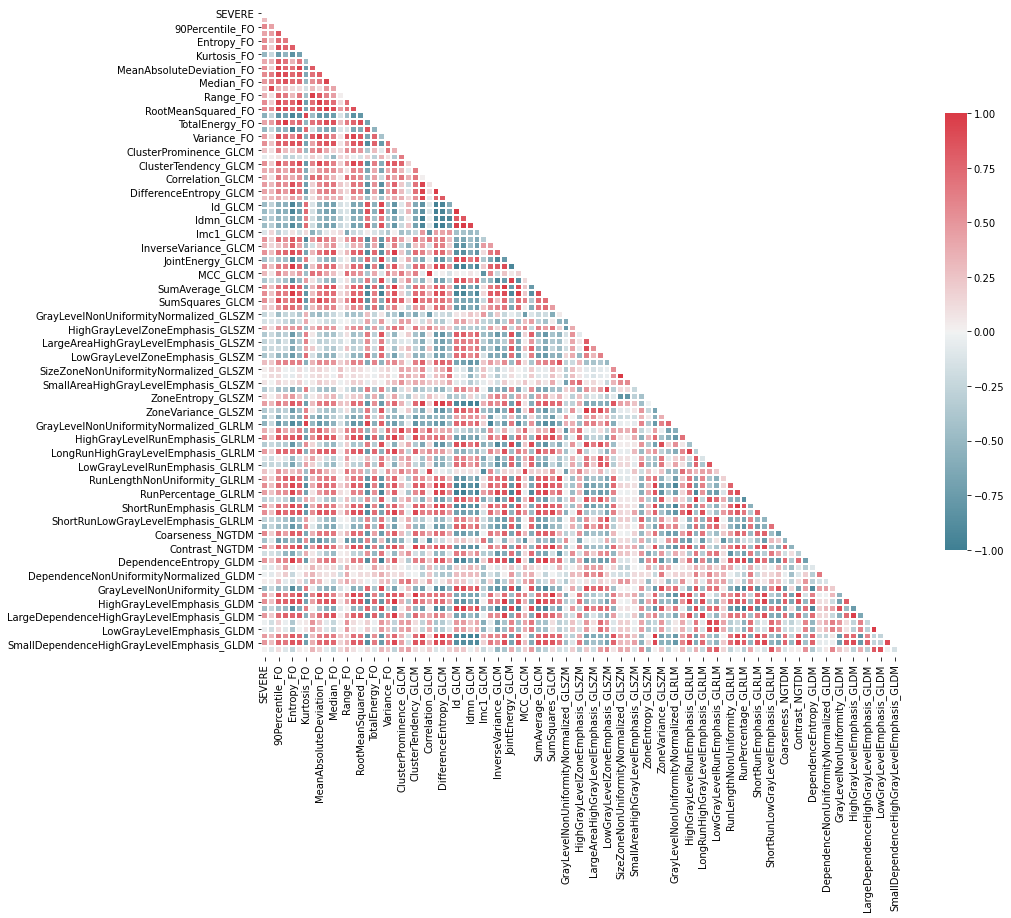

In [9]:
corr_df = makeCorrPlot(data,'all_allCorr')

## Correlation between each feature group and the dependent variable

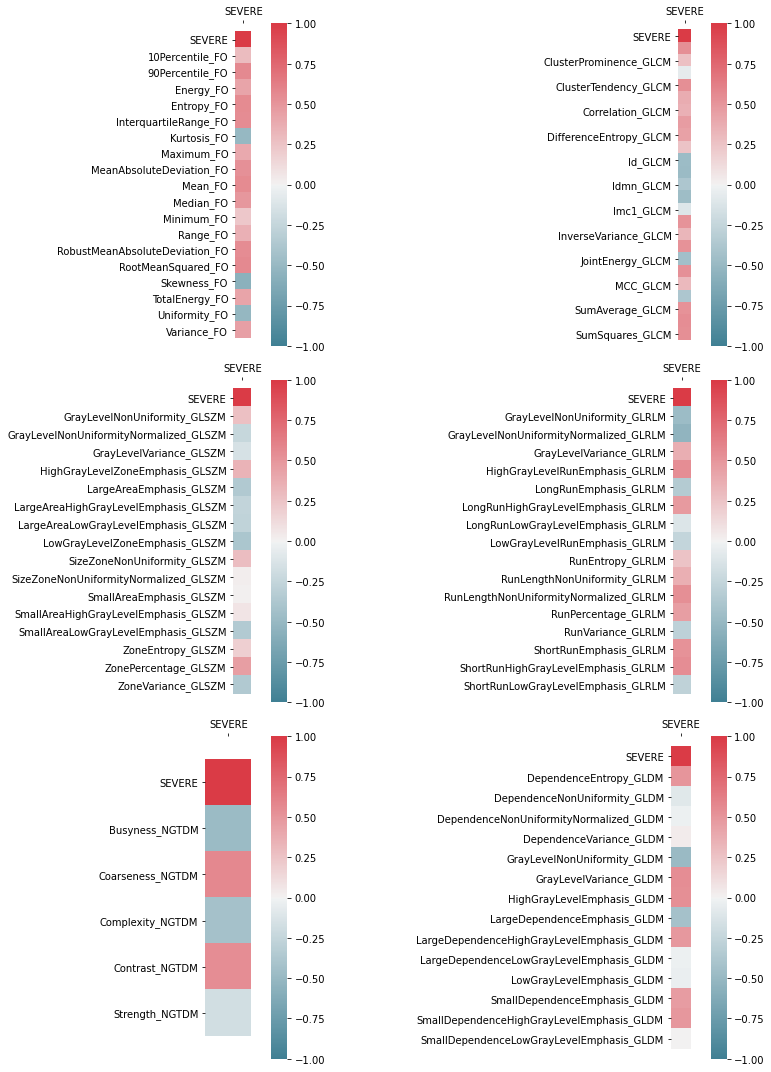

In [14]:
fig, axs = plt.subplots(3,2,figsize = (12,15))
groupFeat = ['FO', 'GLCM', 'GLSZM', 'GLRLM', 'NGTDM', 'GLDM']
cmap = sns.diverging_palette(220, 10, as_cmap=True)

for group, ax in zip(groupFeat, axs.flatten()):
    col = [feat for feat in data.columns if group in feat]
    col.insert(0,'SEVERE')
    corrMask = data[col].corr()
    
    g=sns.heatmap(corrMask.loc[['SEVERE'],:].T, cmap=cmap, ax=ax, square=True, vmin=-1, vmax=1)

    bottom, top = g.get_ylim()
    g.set_ylim(bottom + 0.5, top - 0.5)
    g.xaxis.set_ticks_position('top')
    
plt.ticklabel_format()
plt.tight_layout()
plt.savefig(os.path.join('figures', 'correlation', f'groupFeature.png'), format = 'png')
plt.show()